# Google Workspace Data Automation & Insights
This notebook demonstrates how to automate KPI tracking, perform anomaly detection, and generate dashboards using a business dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Step 1: Load Dataset

In [2]:
df = pd.read_csv('business_kpi_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Region,Channel,Sales,Leads,Conversions,Revenue
0,2024-01-01,North,Email,1360,34,12,533.70
1,2024-01-01,North,Ads,3592,122,20,494.63
2,2024-01-01,North,Social Media,3944,119,41,1471.95
3,2024-01-01,North,Referral,2185,72,3,99.13
4,2024-01-01,South,Email,2933,40,34,2297.84


## Step 2: Data Overview

In [3]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5856 non-null   datetime64[ns]
 1   Region       5856 non-null   object        
 2   Channel      5856 non-null   object        
 3   Sales        5856 non-null   int64         
 4   Leads        5856 non-null   int64         
 5   Conversions  5856 non-null   int64         
 6   Revenue      5856 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 320.4+ KB


,Date,Sales,Leads,Conversions,Revenue
count,5856,5856.000000,5856.000000,5856.000000,5856.000000
mean,2024-07-01 12:00:00.000000256,2737.524590,109.364071,24.809768,795.229454
min,2024-01-01 00:00:00,501.000000,20.000000,2.000000,7.620000
25%,2024-04-01 00:00:00,1613.500000,64.000000,13.000000,246.005000
50%,2024-07-01 12:00:00,2736.000000,109.000000,24.000000,545.285000
75%,2024-10-01 00:00:00,3861.000000,154.000000,37.000000,1069.702500
max,2024-12-31 00:00:00,5000.000000,200.000000,50.000000,5436.600000
std,NaN,1293.615787,52.053546,13.968136,777.974131


## Step 3: KPI Calculations

In [4]:
df['Conversion_Rate'] = df['Conversions'] / df['Leads']
df['Revenue_per_Lead'] = df['Revenue'] / df['Leads']
df.head()

,Date,Region,Channel,Sales,Leads,Conversions,Revenue,Conversion_Rate,Revenue_per_Lead
0,2024-01-01,North,Email,1360,34,12,533.70,0.352941,15.697059
1,2024-01-01,North,Ads,3592,122,20,494.63,0.163934,4.054344
2,2024-01-01,North,Social Media,3944,119,41,1471.95,0.344538,12.369328
3,2024-01-01,North,Referral,2185,72,3,99.13,0.041667,1.376806
4,2024-01-01,South,Email,2933,40,34,2297.84,0.850000,57.446000


## Step 4: Anomaly Detection

In [5]:
from scipy.stats import zscore
df['Sales_z'] = zscore(df['Sales'])
anomalies = df[df['Sales_z'].abs() > 3]
anomalies.head()

,Date,Region,Channel,Sales,Leads,Conversions,Revenue,Conversion_Rate,Revenue_per_Lead,Sales_z


## Step 5: Visualizations

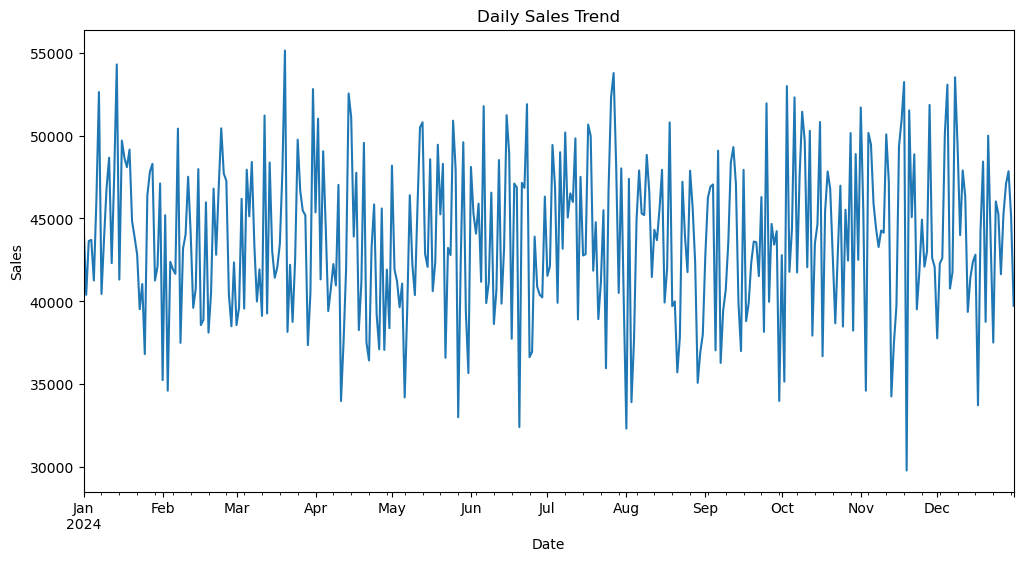

In [6]:
plt.figure(figsize=(12,6))
daily_sales = df.groupby('Date')['Sales'].sum()
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.savefig('dashboards/sales_trend.png')
plt.show()

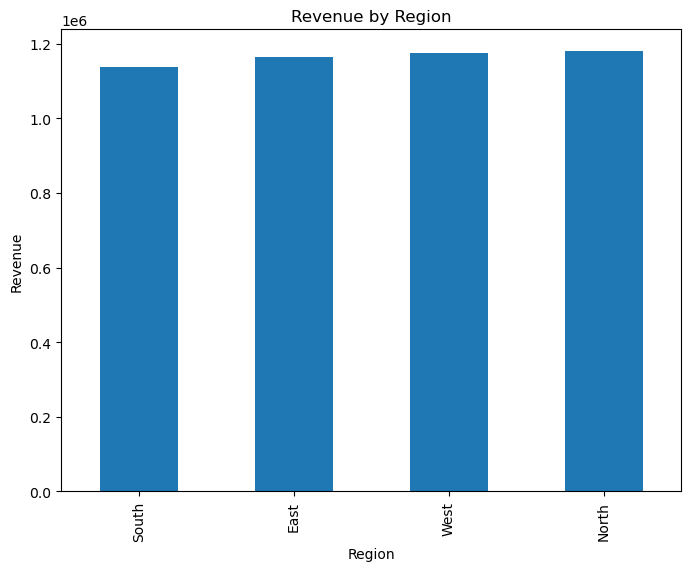

In [7]:
plt.figure(figsize=(8,6))
region_revenue = df.groupby('Region')['Revenue'].sum().sort_values()
region_revenue.plot(kind='bar')
plt.title('Revenue by Region')
plt.ylabel('Revenue')
plt.savefig('dashboards/revenue_by_region.png')
plt.show()

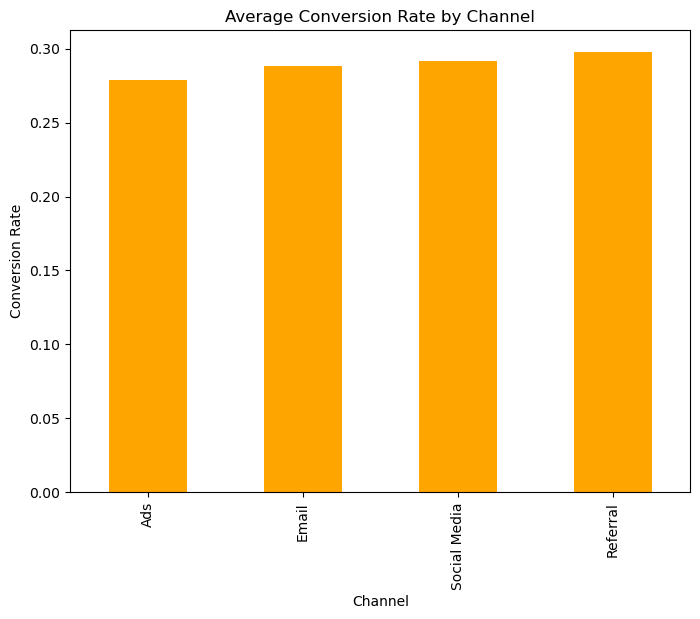

In [8]:
plt.figure(figsize=(8,6))
channel_conv = df.groupby('Channel')['Conversion_Rate'].mean().sort_values()
channel_conv.plot(kind='bar', color='orange')
plt.title('Average Conversion Rate by Channel')
plt.ylabel('Conversion Rate')
plt.savefig('dashboards/channel_performance.png')
plt.show()

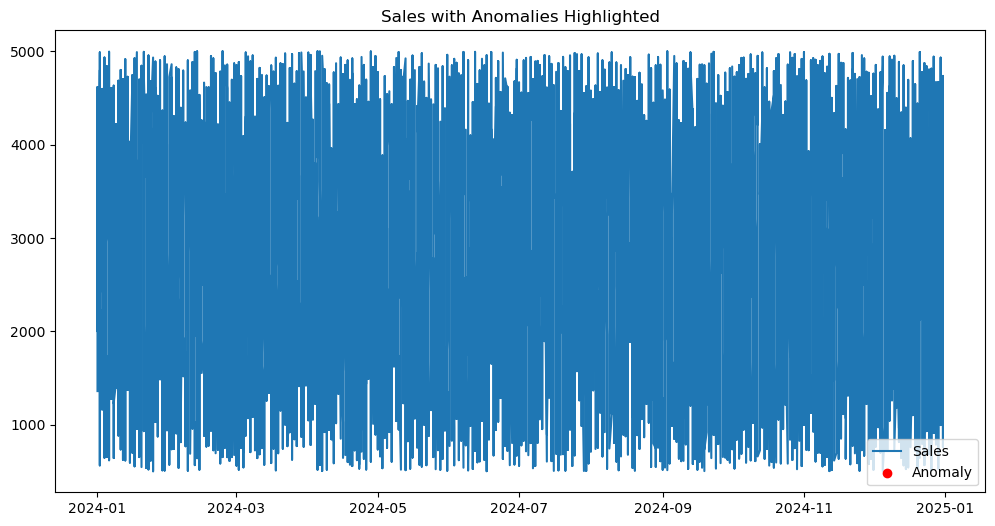

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Sales'], label='Sales')
plt.scatter(anomalies['Date'], anomalies['Sales'], color='red', label='Anomaly')
plt.legend()
plt.title('Sales with Anomalies Highlighted')
plt.savefig('dashboards/anomalies.png')
plt.show()